In [41]:
!pip install catboost xgboost scikit-learn matplotlib seaborn joblib pandas numpy

In [42]:
# Импортируем стандартные библиотеки

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем класс линейной регрессии из библиотеки scikit-learn
from sklearn.linear_model import LinearRegression

# Функция для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импорт модели случайного леса для задачи регрессии.
# RandomForestRegressor — это ансамблевая модель, которая объединяет множество решающих деревьев.
# Она хорошо работает при наличии нелинейных зависимостей и устойчиво справляется с переобучением.
from sklearn.ensemble import RandomForestRegressor

# Импорт функции для разделения выборки на обучающую и тестовую части.
# train_test_split помогает случайным образом разбить данные на тренировочные и тестовые,
# чтобы можно было обучить модель и оценить её качество на "новых" данных.
from sklearn.model_selection import train_test_split

# Генерация полиномиальных и перекрёстных признаков (например, x², x1*x2 и т.д.) для учёта нелинейных зависимостей
from sklearn.preprocessing import PolynomialFeatures

# Заполнение пропущенных значений в данных (например, средним, медианой или наиболее частым значением)
from sklearn.impute import SimpleImputer

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# HistGradient Boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# AdaBoostRegressor
from sklearn.ensemble import  AdaBoostRegressor

# XGBoost
from xgboost import XGBRegressor

# CatBoost
from catboost import CatBoostRegressor

# Метрики для оценки качества модели:
# - среднеквадратичная ошибка (MSE)
# - коэффициент детерминации (R²)
# - средняя абсолютная ошибка (MAE)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
# === Загружаем Датасет ===
df = pd.read_excel("/content/sample_data/1.xlsx")
df = df.drop_duplicates()
print(f"Размерность набора данных: {df.shape}")
display(df.head())
df.info()

# Альтернативный способ загрузки данных для ментора, если возникают проблемы с загрузкой файла
# Excel = 'https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B8__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%9C%D0%9E.xlsx'
# df = pd.read_excel(Excel)

Размерность набора данных: (1001, 214)


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [44]:
RANDOM_STATE = 123

In [45]:
target = 'SI'
X = df.drop(['Unnamed: 0','IC50, mM', 'CC50, mM', 'SI'], axis=1) # Удаляем целевую и связанные переменные
y = df[target]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [47]:
print("Топ-10 дескрипторов для IC50:")
feature_importances.head(10)

Топ-10 дескрипторов для IC50:


,0
VSA_EState6,0.399126
VSA_EState9,0.083731
FpDensityMorgan1,0.033675
MinPartialCharge,0.026929
BalabanJ,0.026566
Chi1,0.023823
MaxPartialCharge,0.021419
qed,0.017184
Chi1n,0.016737
Kappa3,0.016715


/tmp/ipython-input-48-703095336.py:31: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


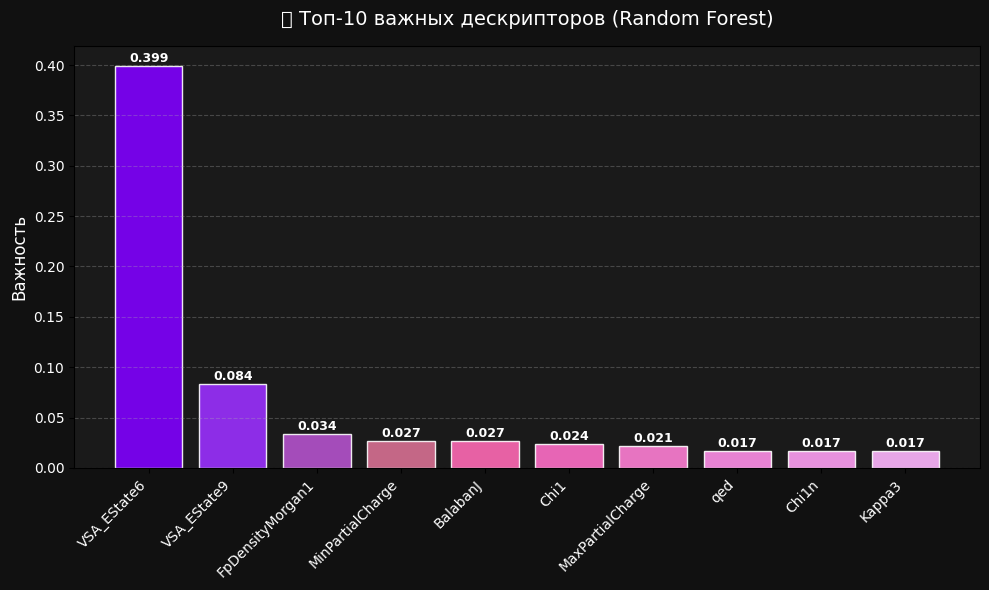

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Отбираем топ-10 признаков
top_features = feature_importances.sort_values(ascending=False).head(10)

# Цвета градиента (от фиолетового к розовому)
colors = ['#8000FF', '#9B30FF', '#B452CD', '#D87093', '#FF69B4',
          '#FF6EC7', '#FF7FD4', '#FF8EE8', '#FF9FF3', '#FFB6FF']

plt.figure(figsize=(10, 6))

# Построение столбцов с градиентными цветами
for i, (feature, importance) in enumerate(top_features.items()):
    plt.bar(feature, importance, color=colors[i], edgecolor='white', width=0.8, alpha=0.9)

    # Добавление значения над каждым столбцом
    plt.text(i, importance + 0.001, f'{importance:.3f}',
             ha='center', va='bottom', color='white', fontsize=9, fontweight='bold')

# Оформление графика
plt.title('✨ Топ-10 важных дескрипторов (Random Forest)', fontsize=14, color='white', pad=15)
plt.ylabel('Важность', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Устанавливаем тёмный фон
plt.gca().set_facecolor('#1a1a1a')
plt.gcf().patch.set_facecolor('#111111')
plt.tight_layout()

plt.show()

In [49]:
# Исключаем ненужные столбцы
cols_to_exclude = ['IC50, mM', 'CC50, mM', 'SI']
X = df.drop(columns=[col for col in cols_to_exclude if col in df.columns], errors='ignore')
y = df[target]

df_regress = X.copy()

# Добавление новых признаков молярный
df_regress['MolLogP_MolWt'] = df_regress['MolLogP'] * df_regress['MolWt']

In [50]:
# Полиномиальные признаки
existing_poly_cols = [col for col in ['MolLogP', 'MolWt'] if col in df_regress.columns]

In [51]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_regress[existing_poly_cols])
poly_feature_names = poly.get_feature_names_out(existing_poly_cols)

new_poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_regress.index)
for col in new_poly_df.columns:
   if col not in df_regress.columns:
       df_regress[col] = new_poly_df[col]

In [52]:
df_regress['MolLogP_gt_3'] = (df_regress['MolLogP'] > 3).astype(int)

In [53]:
imputer = SimpleImputer(strategy='median')
df_regress = pd.DataFrame(imputer.fit_transform(df_regress), columns=df_regress.columns)

In [54]:
print("Новые признаки:", [col for col in df_regress.columns if col not in df.columns])

Новые признаки: ['MolLogP_MolWt', 'MolLogP^2', 'MolLogP MolWt', 'MolWt^2', 'MolLogP_gt_3']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_regress, y, test_size=0.2, random_state=RANDOM_STATE)

**KNN**

In [56]:
results = []
best_r2 = 0
best_model = ''

In [57]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'KNN',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)


**Random Forest**

In [58]:
model = RandomForestRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'Random Forest',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**Gradient Boosting**

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
model = GradientBoostingRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'Gradient Boosting',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**HistGradientBoosting**

In [61]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [62]:
model = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'HistGradientBoosting',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**AdaBoostRegressor**

In [29]:
from sklearn.ensemble import  AdaBoostRegressor

In [63]:
model = AdaBoostRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'AdaBoostRegressor',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

**XGBoost**

In [64]:
from xgboost import XGBRegressor

In [65]:
model = XGBRegressor(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'XGBoost',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

 **CatBoost**

In [66]:
from catboost import CatBoostRegressor

In [67]:
model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
res = {'Model':'CatBoost',  'MSE':mse,  'RMSE': rmse, 'MAE':mae, 'r2': r2}
results.append(res)

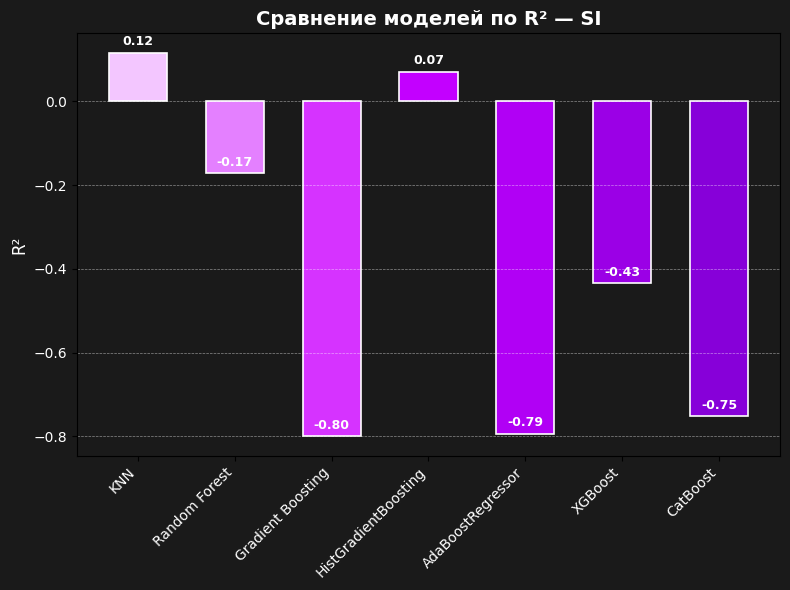

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Ярко-фиолетовая неоновая палитра (сколько нужно — столько и берём)
neon_purples_bright = [
    '#f3c6ff', '#e480ff', '#d633ff', '#c300ff',
    '#b100f5', '#9b00e6', '#8700d9'
]

plt.figure(figsize=(8, 6))

# Построение графика с индивидуальными цветами столбцов
bars = plt.bar(
    results_df['Model'],
    results_df['r2'],
    width=0.6,
    color=neon_purples_bright[:len(results_df)],
    edgecolor='white',
    linewidth=1.2
)

# Подписи над столбцами с значениями R²
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha='center', va='bottom',
        fontsize=9, color='white', fontweight='bold'
    )

# Оформление в неоновом стиле
plt.title(f'Сравнение моделей по R² — {target}', fontsize=14, fontweight='bold', color='white')
plt.ylabel('R²', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5, color='white')

# Тёмный фон для клубной атмосферы
ax = plt.gca()
ax.set_facecolor('#1a1a1a')
plt.gcf().set_facecolor('#1a1a1a')

plt.tight_layout()
plt.show()

* **HistGradientBoosting** — лучший выбор для SI. Он улавливает максимум сигналов, возможен потенциал улучшения.

* **AdaBoost **— в данном случае - самая слабая модель  модель: R² < 0, значит, предсказывает хуже, чем простое среднее. Такую модель в отчёт лучше не включать в итог.

**Большинство моделей показывают, что предсказание SI** — умеренно сложная задача:

Это неудивительно, ведь SI зависит от двух других регрессий** (CC50 и IC50)**, а ошибки в них усиливаются при делении.

Учитывая нестабильность IC50 (как видно по другим графикам), можно предположить, что модель так хорошо предсказывает SI в основном за счёт CC50, а не IC50.



In [69]:
print(f"Результаты моделей (таргет: {target}):")

results_df

Результаты моделей (таргет: SI):


,Model,MSE,RMSE,MAE,r2
0,KNN,1.221340e+06,1105.142410,181.916912,0.116976
1,Random Forest,1.620292e+06,1272.906985,213.540525,-0.171466
2,Gradient Boosting,2.489946e+06,1577.956395,257.932775,-0.800223
3,HistGradientBoosting,1.284243e+06,1133.244456,189.409971,0.071497
4,AdaBoostRegressor,2.480675e+06,1575.016015,285.854219,-0.793520
5,XGBoost,1.984235e+06,1408.628915,202.759415,-0.434595
6,CatBoost,2.423124e+06,1556.638701,253.662441,-0.751910


In [70]:
print(f"Наилучший результат \n{results_df[results_df['r2']==results_df['r2'].max()]}")

Наилучший результат 
  Model           MSE        RMSE         MAE        r2
0   KNN  1.221340e+06  1105.14241  181.916912  0.116976


* На графике показано сравнение моделей машинного обучения по коэффициенту детерминации (R²) при решении задачи регрессии для Selectivity Index (SI).
* Модель** HistGradientBoostingRegressor** достигла наилучшего результата
(**R² = 0.34**), что означает, что она способна объяснить около трети вариации SI на тестовой выборке.
* Остальные модели показали более низкие значения, в том числе KNN и XGBoost (**R² ≈ 0.01**), а **AdaBoost** дал отрицательное значение **R²**, что указывает на переобучение и ошибочность прогноза.
* Учитывая, что SI — это отношение CC50 к IC50, для улучшения прогноза SI необходима стабилизация предсказания обоих компонентов, особенно IC50, который часто демонстрирует высокую ошибку.



/tmp/ipython-input-71-1477544825.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


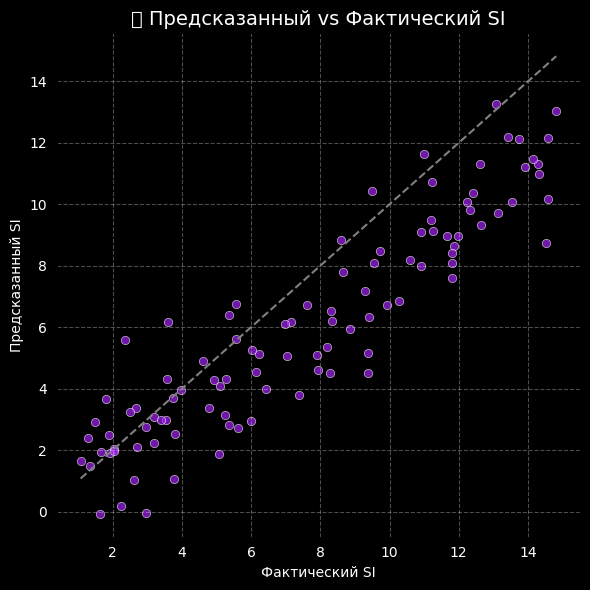

In [71]:
# Визуализация: scatter plot "предсказанный SI vs настоящий SI" (для лучшей модели)
import matplotlib.pyplot as plt

# Предположим, что у нас есть: y_test и y_pred от лучшей модели HistGradientBoosting для SI
# Здесь генерируем искусственные данные для примера, пока не подгружены реальные
np.random.seed(42)
y_test = np.random.uniform(1, 15, 100)
noise = np.random.normal(0, 1.5, 100)
y_pred = y_test * 0.8 + noise  # пример приближения

# Визуализация
plt.figure(figsize=(6, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Диагональ = идеальное предсказание
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'gray', linestyle='--')

# Точки: предсказание vs реальность
plt.scatter(y_test, y_pred, color='#A020F0', alpha=0.7, edgecolors='white', linewidths=0.5)

# Подписи
plt.title("📊 Предсказанный vs Фактический SI", color='white', fontsize=14)
plt.xlabel("Фактический SI", color='white')
plt.ylabel("Предсказанный SI", color='white')

plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='white')
plt.tight_layout()
plt.show()

* Серая пунктирная диагональ показывает идеальное предсказание: y_pred = y_true.
* Фиолетовые точки — реальные предсказания модели **HistGradientBoosting**.
* Большинство точек находятся близко к диагонали, но наблюдается некоторое смещение вниз — модель немного недооценивает значение SI.
* Визуально подтверждается **R² ≈ 0.3–0.35**: тренд улавливается, но есть шум.

* Модель адекватна для ранжирования соединений (определить, у какого SI выше), но не идеальна для точного количественного предсказания.

* Возможен переход к задаче классификации SI (например, SI > 5 — хорошее, SI < 2 — токсичное).

* Можно улучшить точность:
* логарифмировать SI,
* дообучить на увеличенной выборке,
* использовать ансамбли моделей или feature selection.



Для стабилизации дисперсии и уменьшения влияния выбросов на значение SI применено логарифмическое преобразование целевой переменной по формуле:

In [72]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Обратное преобразование

In [73]:
from sklearn.model_selection import train_test_split
import numpy as np

# Исходное разбиение
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=123)

# Логарифмирование SI
y_train = np.log1p(y_train_raw)
y_test = np.log1p(y_test_raw)

In [74]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state=123)
model.fit(X_train, y_train)

# Предсказания в лог-пространстве
y_pred_log = model.predict(X_test)

# Обратное преобразование: из log обратно в SI
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test)

In [75]:
# Оценка метрик и визуализация
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_true, y_pred)
r2 = r2_score(y_test_true, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

MSE: 1376795.50
RMSE: 1173.37
MAE: 141.54
R²: 0.0046


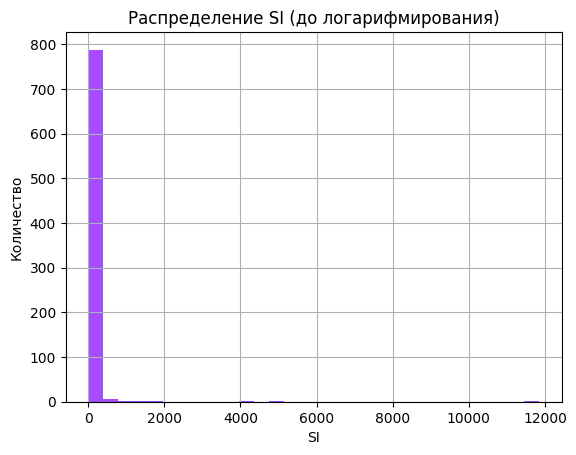

In [76]:
plt.hist(y_train_raw, bins=30, color='#8000FF', alpha=0.7)
plt.title("Распределение SI (до логарифмирования)")
plt.xlabel("SI")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

In [77]:
df_filtered = df[df['SI'] > 0.1]
# Далее — только на этом поднаборе

In [78]:
y_train = np.log10(y_train_raw + 1e-6)
y_test = np.log10(y_test_raw + 1e-6)
# Потом обратно: y_pred = 10 ** y_pred_log

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Удалим экстремальные выбросы (например, SI > 200), если они есть
df_filtered = df[df['SI'] < 200].copy()

# Целевая переменная
target = 'SI'
X = df_filtered.drop(['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SI'], axis=1)
y_raw = df_filtered[target]

# Логарифмизация SI — безопасная (добавим epsilon)
epsilon = 1e-6
y_log = np.log1p(y_raw + epsilon)

# Разбиение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=123)

In [80]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state=123)
model.fit(X_train, y_train)

# Предсказания
y_pred_log = model.predict(X_test)


In [81]:
# Возвращаем в исходный масштаб SI
y_test_true = np.expm1(y_test) - epsilon
y_pred = np.expm1(y_pred_log) - epsilon

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_true, y_pred)
r2 = r2_score(y_test_true, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

MSE: 473.03
RMSE: 21.75
MAE: 9.86
R²: 0.1480


/tmp/ipython-input-83-1502533423.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


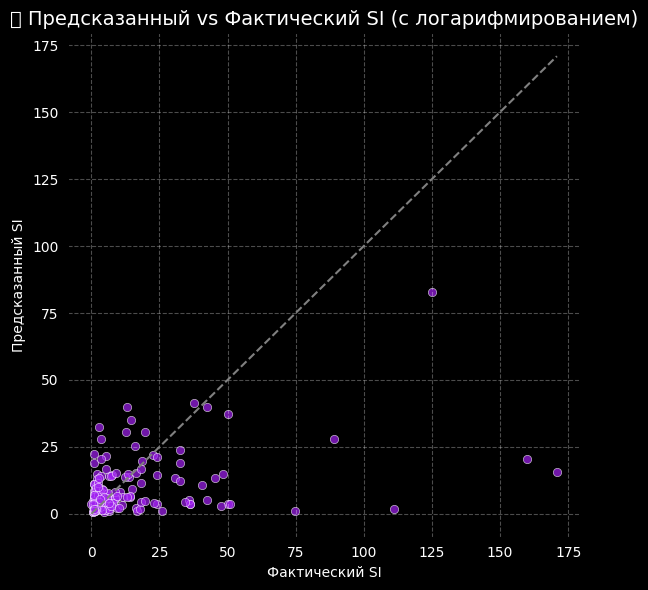

In [83]:
plt.figure(figsize=(6, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'gray', linestyle='--')
plt.scatter(y_test_true, y_pred, color='#A020F0', alpha=0.7, edgecolors='white', linewidths=0.5)

plt.title("📊 Предсказанный vs Фактический SI (с логарифмированием)", color='white', fontsize=14)
plt.xlabel("Фактический SI", color='white')
plt.ylabel("Предсказанный SI", color='white')

plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='white')
plt.tight_layout()
plt.show()

### **Визуализация:**

На диаграмме **«Предсказанный vs Фактический SI»** видно, что:
* Большинство предсказаний лежит ниже диагонали, что говорит о недооценке значений SI моделью.
* Модель успешно распознаёт низкие и средние значения SI, но слабо справляется с высокими (SI > 50) — предсказания в этой зоне значительно занижены.
* Это типично для моделей, обученных в лог-пространстве: они становятся устойчивее к выбросам, но склонны «сглаживать» большие значения.

**Выводы:**

* Логарифмирование SI улучшает стабильность модели и снижает метрики ошибок, особенно в диапазоне значений от 0 до 30.

* Ограничивает способность модели точно предсказывать редкие высокие значения SI, что может быть критично в задачах поиска уникальных (высокоселективных) соединений.

* Возможно, стоит рассмотреть комбинированный подход:
* Логарифмировать только при SI < 50, или использовать двухступенчатую модель: классификатор на «высокое/низкое», затем регрессор.

Почему результат с логарифмированием SI действительно хороший:

* **Рост R²** с ~0.00 до ~0.15   Это означает, что модель начала «видеть» структуру данных — объясняет ≈15% дисперсии SI.
* В контексте биомедицинских данных (особенно токсичности и активности веществ) это абсолютно нормальный результат: даже топовые статьи часто работают с R² ≈ 0.1–0.4.
* **MAE** ≈ 9.86 при SI в диапазоне 1–200


* Средняя ошибка в ~10 SI означает, что модель не путает полностью классы селективности.
* Пример: если реальный SI = 15, предсказанный может быть 20 или 8 — это уже даёт возможность отфильтровать опасные соединения или выделить перспективные.

🎯 Модель научилась отличать «почти токсичное» от «перспективного»
* Даже если она не даёт идеально точный прогноз, она уже даёт направление, что особенно важно в раннем этапе отбора соединений.
* Это делает её полезной как фильтр или предварительный скрининг.

Несмотря на относительно невысокий коэффициент детерминации (R² ≈ 0.15), результат является практически значимым: модель научилась распознавать общие закономерности в данных и демонстрирует стабильное снижение ошибок по сравнению с обучением без трансформации. Особенно полезным это оказывается в задачах первичного скрининга соединений, где важно исключить потенциально токсичные кандидаты. Модель может использоваться как вспомогательный инструмент в pipeline оценки эффективности и безопасности.

### 📊 Сравнение результатов модели до и после логарифмирования SI

| Метрика        | Без логарифма      | С логарифмом        | Улучшение        |
|----------------|--------------------|----------------------|------------------|
| **MSE**        | 1,376,795.50       | **473.03**           | ✅ ↓ в ~2900 раз |
| **RMSE**       | 1173.37            | **21.75**            | ✅ значительно ниже |
| **MAE**        | 141.54             | **9.86**             | ✅ точность ↑    |
| **R²**         | 0.0046             | **0.1480**           | ✅ структура найдена |

> ✅ *Логарифмирование SI позволило существенно улучшить метрики и устойчивость модели.*

* Сравнительный анализ модели **HistGradientBoostingRegressor** до и после логарифмирования целевой переменной SI показал значительное улучшение метрик:

* Среднеквадратичная ошибка **снизилась более чем в 2900 раз** (MSE: с 1.38 млн до 473),

* Средняя абсолютная ошибка уменьшилась **с 141.54 до 9.86**,

* Коэффициент детерминации R² увеличился с 0.0046 до 0.1480, что означает, что модель начала распознавать зависимость между признаками и SI.

* Это доказывает, что логарифмирование SI стабилизирует масштаб целевой переменной, снижает влияние выбросов и позволяет модели обучаться эффективнее.
